In [1]:
import numpy as np #scientific computing package, for making arrays
import pandas as pd #data analysis module, for making data frames
import matplotlib.pyplot as plt #plotting module
import seaborn as sns
from math import *

In [2]:
plt.rcParams['figure.dpi'] = 100 #lower  quality inline figure
plt.rcParams['savefig.dpi'] = 600 #high quality save file for publication

In [3]:
hb = pd.read_csv('09_ankyrin_hb_1.csv')
sb = pd.read_csv('00_ankyrin_sb_phos.csv')
pi = pd.read_csv('00_ankyrin_pi.csv')
# df_wide = hb.pivot_table( index='Z', columns='Theta', values='Hbonds')

In [4]:
# copy the data
hb_min_max = hb.copy()
sb_min_max = sb.copy()
pi_min_max = pi.copy()

# apply normalization techniques by Column 1
column = 'Hbonds'
hb_min_max[column] = (hb_min_max[column] - hb_min_max[column].min()) / (hb_min_max[column].max() - hb_min_max[column].min())    

# apply normalization techniques by Column 1
column = 'Bonds'
sb_min_max[column] = (sb_min_max[column] - sb_min_max[column].min()) / (sb_min_max[column].max() - sb_min_max[column].min())

# apply normalization techniques by Column 1
column = 'Total_Bonds'
pi_min_max[column] = (pi_min_max[column] - pi_min_max[column].min()) / (pi_min_max[column].max() - pi_min_max[column].min())

In [5]:
#create a list with the normalized column for each type of bond
hb_norm = hb_min_max['Hbonds']
sb_norm = sb_min_max['Bonds']
pi_norm = pi_min_max['Total_Bonds']

In [6]:
#create a new dataframe to store the combined normalized bond data in
#I am using hb dataframe as a template since it already has the z and theta values
all = hb.copy()

#adds a column with each type of bond to the new dataframe
all['Hbonds'] = hb_norm
all['SBbonds'] = sb_norm
all['PiBonds'] = pi_norm

#create a new column "Total" that contains the combined value for all normazlied bonds
all = all.assign(Total = all['Hbonds'] + all['SBbonds'])
all = all.assign(Total = all['Total'] + all['PiBonds'])
# all.to_csv('00_ankyrin_all.csv')

#create a new dataframe to normalize the values in the total column
all_norm = all.copy()
# apply normalization technique to the total column
column = 'Total'
all_norm[column] = (all_norm[column] - all_norm[column].min()) / (all_norm[column].max() - all_norm[column].min())
#create a csv file 
all_norm.to_csv('00_ankyrin_all_norm.csv')

    Unnamed: 0     Z  Theta    Hbonds   SBbonds  PiBonds     Total
0            0 -23.8     18  0.155556  0.000000      0.0  0.077778
1            1 -23.8     54  0.088889  0.000000      0.0  0.044444
2            2 -23.8     90  0.222222  0.000000      0.0  0.111111
3            3 -23.8    126  0.022222  0.000000      0.0  0.011111
4            4 -23.8    162  0.244444  0.060606      0.0  0.152525
..         ...   ...    ...       ...       ...      ...       ...
75          75  23.8    198  0.244444  0.000000      0.0  0.122222
76          76  23.8    234  0.266667  0.000000      0.0  0.133333
77          77  23.8    270  0.044444  0.000000      0.0  0.022222
78          78  23.8    306  0.022222  0.000000      0.0  0.011111
79          79  23.8    342  0.400000  0.000000      0.0  0.200000

[80 rows x 7 columns]


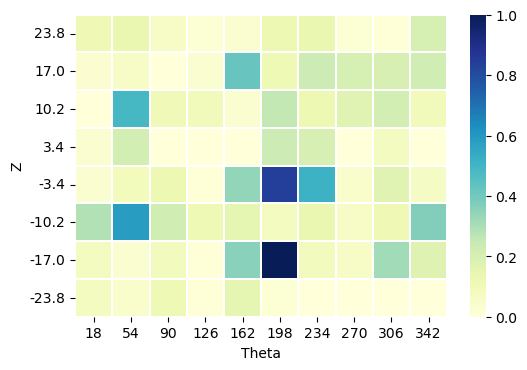

In [10]:
#load the dataframe
data = pd.read_csv('00_ankyrin_all_norm.csv')
print(data)
df_wide = data.pivot_table( index='Z', columns='Theta', values='Total')

hm = sns.heatmap(df_wide, cmap="YlGnBu", linewidths=.003)
hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
hm.invert_yaxis()
hm_fig = hm.get_figure() #this line may be an issue for the cluster, since there are no graphics
hm_fig.savefig("ankyrin_all_norm.png")